### Algorithms
- LinearRegression:
- 

### From MOOC

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn # python -m pip install scikit-learn 
from sklearn.linear_model import LinearRegression
import pandas as pd


In [ ]:
np.random.seed(0)
n=50   # Number of data points
x= np.linspace(0, 10, n) # x, y: arrays 1 dim 20 items
y = 2*x + 1 + 1 *np.random.randn(n) # Standard deviation 1 # khoi tao gia tri cua y co dua theo x nhung added them rand value

In [ ]:
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [ ]:
model = LinearRegression(fit_intercept=True)# fit_intercept = False for calculating the bias
model.fit(x[:, np.newaxis], y) #train model


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


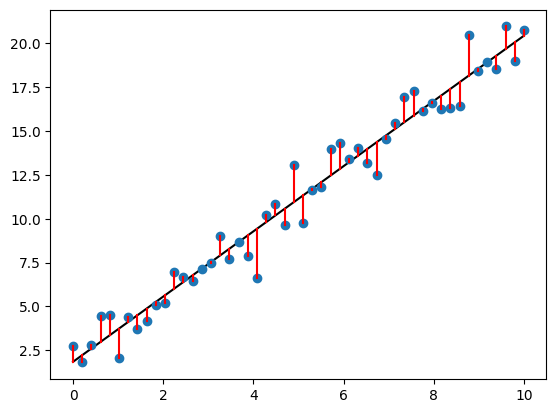

In [ ]:
xfit = np.linspace(0,10,100) #linearly spaced (equal distance apart)
yfit = model.predict(xfit[:, np.newaxis]) # get prediction from trained model with new variables
plt.plot(xfit, yfit, color="black") # Ve duong hoi quy
plt.plot(x,y, 'o') # ve gia tri x, y ban dau 
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red");
plt.show()

In [ ]:
#help(plt.plot)


In [ ]:
print(f"coef_: { model.coef_}, intercept_:{model.intercept_}")
# y= mx + b 
# model.coef_ = Coefficient(m) (hệ số): how much y changes for a one-unit increase in x.
# model.intercept_ = Intercept(b) (Chặn): value of y when x=0.
# coef_: [1.88627741], intercept_:2.1379475205341354 20
# coef_: [1.85883775], intercept_:1.846370518808186 50


coef_: [1.85883775], intercept_:1.846370518808186


In [2]:
sample1=np.array([1,2,3])   # The three explanatory variables have values 1, 2, and 3, respectively
sample2=np.array([4,5,6])   # Another example of values of explanatory variables
sample3=np.array([7,8,10])   # ...
y=np.array([15,39,66]) + np.random.randn(3)   # For values 1,2, and 3 of explanatory variables, the value y=15 was observed, and so on.


### Multiple features

In [ ]:
x=np.vstack([sample1,sample2,sample3])
model2 = LinearRegression(fit_intercept=True)
model2.fit(x,y)
print(f"coef_2: { model2.coef_}, intercept_2:{model2.intercept_}")


coef_2: [3.26783689 3.26783689 1.70698822], intercept_2:-0.7509138815204182


In [ ]:
model2.coef_.T

array([3.26783689, 3.26783689, 1.70698822])

In [ ]:

b= model2.coef_[:, np.newaxis]
print(b.shape)
print(f"x={x}")
print(f"b={b}")
print("y=", y)
print(np.matmul(x,b))

(3, 1)
x=[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
b=[[3.26783689]
 [3.26783689]
 [1.70698822]]
y= [14.17356146 38.90154748 65.33652171]
[[14.92447534]
 [39.65246136]
 [66.0874356 ]]


In [ ]:
y = np.array([[15, 39, 66]])
y.T

array([[15],
       [39],
       [66]])

### Polynomial regression (đa thức)

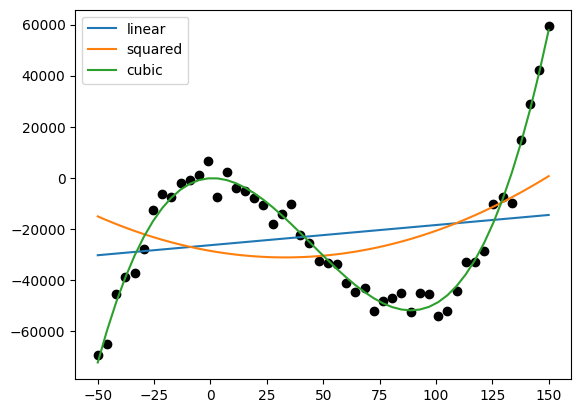

In [ ]:
x = np.linspace(-50, 150, 50)
y = 0.15 * x**3 - 20 * x**2 + 5 *x - 4 + 5000 * np.random.randn(50)

plt.scatter(x, y, color='black')

model_linear = LinearRegression(fit_intercept=True) #liner
model_squared = LinearRegression(fit_intercept=True) # squared: U-shape
model_cubic = LinearRegression(fit_intercept=True) # cubic: co tham so x^3, Curved S-shape 
x2 = x**2
x3 = x**3

model_linear.fit(x[:, np.newaxis], y)# same as np.vstack(x).T
model_squared.fit(np.vstack([x, x2]).T, y)
model_cubic.fit(np.vstack([x,x2, x3]).T, y)

xf = np.linspace(-50, 150, 50)
yf_linear = model_linear.predict(x[:, np.newaxis])
yf_squared = model_squared.predict(np.vstack([x, x2]).T)
yf_cubic = model_cubic.predict(np.vstack([x, x2, x3]).T)

plt.plot(xf, yf_linear, label='linear')
plt.plot(xf, yf_squared, label='squared')
plt.plot(xf, yf_cubic, label='cubic')
plt.legend()

[7.9506745] -9.908440745441766


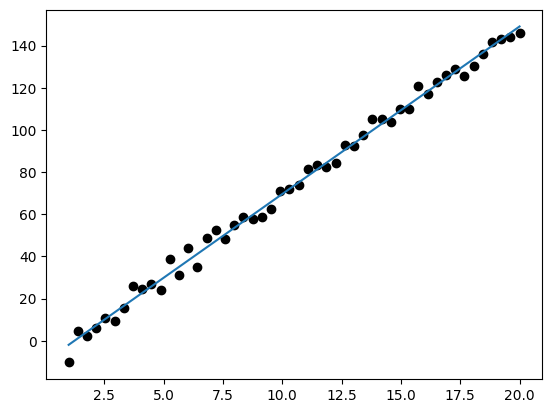

In [ ]:
def fit_line (x, y):
    x_arr = np.vstack([x]).T
    model = LinearRegression(fit_intercept=True)
    model.fit(x_arr, y)
    
    return (model.coef_, model.intercept_) # variable underscore _ at the end: this value appeared after fit() called

xt = np.linspace(1, 20, 50)
yt = 8 * xt - 10 + 3 * np.random.randn(50)
plt.scatter(xt, yt, color='black')

a, b = fit_line(xt, yt )
print(a,b)

yf = a * xt + b
plt.plot(xt, yf)

In [ ]:
n_samples = 50 
X = np.random.randn(n_samples, 5)  # return a maxtrix (50,5) as 5 features
y = np.dot(X, np.array([1.5, -2.0, 3.0, -1.0, 2.5])) + 0.5* np.random.random(50)
y


df = pd.DataFrame(data=X, columns=[f"Feature {i}" for i in np.arange(5)])
df['Response'] = y
df.to_csv('mystery_data.tsv', sep='\t', index=False)

In [ ]:
data = pd.read_csv('mystery_data.tsv', sep='\t')


In [ ]:
model = LinearRegression(fit_intercept=False)
X = data.iloc[:, :-1]
y = np.hstack(data.iloc[:, -1])
model.fit(X, y)



[ 1.54124204 -2.04360959  3.00880237 -1.03575094  2.42341439]
0.0


array([ 1.36940215, -0.3858315 ,  0.36196071,  1.77405634,  0.68216948,
       -1.52439515,  0.56984432, -0.88622082, -1.02155985, -0.14948401,
       -0.48003366,  0.78862933,  0.64921053, -0.02191124, -1.0188856 ,
       -0.10796194,  0.75048254,  0.48347173, -0.69043143,  2.11201962,
        0.99390224, -0.06958855,  0.10672049, -0.7735128 ,  1.57708821,
        1.13644763,  0.86766522, -1.9405334 , -0.25321737,  0.18697941,
        1.25794994,  0.81108968,  0.84064848,  0.09500266,  0.52738853,
       -0.32974236,  0.12517461, -0.22612373, -0.09587145,  0.30345193,
       -0.98189969, -2.44522749,  1.43055682,  0.46387277, -0.20199196,
        0.62535543,  0.75882955,  1.90659868,  1.01009078, -0.15059511])

In [ ]:
for i, v in enumerate(model.coef_):
    print(f"Coefficient of X{i} is {v}")

Coefficient of X0 is 1.5412420412424865
Coefficient of X1 is -2.043609586825442
Coefficient of X2 is 3.008802365608823
Coefficient of X3 is -1.0357509408566132
Coefficient of X4 is 2.423414391840337


In [ ]:
X = data.iloc[:, -1].values.reshape(-1,1)
X

array([[ 4.53457545],
       [-0.83044196],
       [ 1.78221279],
       [ 4.44031298],
       [-3.07614706],
       [ 0.62604235],
       [-4.64610018],
       [-7.7364189 ],
       [-3.84534871],
       [-6.22616341],
       [-4.69707824],
       [-1.52966759],
       [ 9.87590595],
       [-1.12700106],
       [-2.83151489],
       [-0.94670968],
       [ 1.78600211],
       [ 1.09526225],
       [ 0.48683748],
       [-4.96006098],
       [-2.02601327],
       [-3.38465495],
       [-2.56226935],
       [-5.22092836],
       [ 5.04095416],
       [ 9.44552456],
       [ 5.93594266],
       [-0.13858804],
       [-8.24812652],
       [ 3.14095388],
       [ 6.1756869 ],
       [ 9.62174122],
       [ 5.84335177],
       [ 6.96034393],
       [-6.17103177],
       [-4.97473194],
       [ 5.39602912],
       [ 4.82697593],
       [-3.38805793],
       [ 5.94255344],
       [-6.23568106],
       [ 1.91434174],
       [ 6.53295994],
       [ 5.56002397],
       [-5.25861702],
       [ 8

In [ ]:
def coefficient_of_determination(data: pd.DataFrame): 
    model_2 = LinearRegression(fit_intercept=True)
    arr_rs = []
    y = np.hstack(data.iloc[:, -1])
    X = data.iloc[:,:-1]
    model_2.fit(X, y)
    r2 = model_2.score(X,y)
    arr_rs.append(r2)

    for i in np.arange(5):
        X = data.iloc[:,[i]]
        model_2.fit(X, y)
        r2 = model_2.score(X,y)
        arr_rs.append(r2)
    return arr_rs

rs = coefficient_of_determination(data)
print(rs)

[0.9992253390252308, 0.14333361377222908, 0.25369042056936963, 0.3059194989309866, 0.01605888471854644, 0.34362567864774596]


### Demo Linear Regression (Fom ML co ban)

In [8]:
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T # bien chieu cao (cm)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T            # bien can nang (kg)


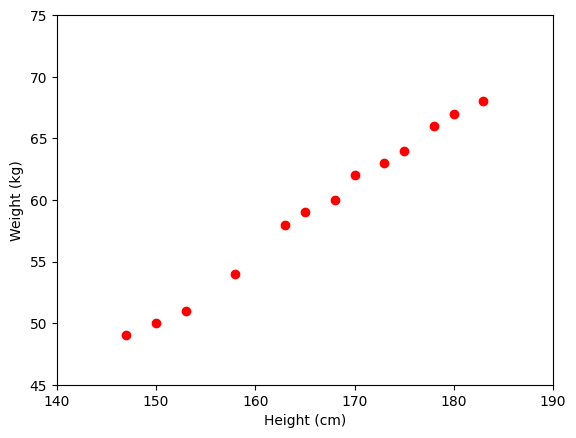

In [ ]:
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75]) # [xmin, xmax, ymin, ymax]
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

### Nghiệm theo công thức


In [31]:
one = np.ones((X.shape[0], 1)) # tao 1 matrix co so dong tuong duong X
Xbar = np.concatenate((one, X), axis = 1) # X d la matrix roi, nen dung concatenate de ghep 2 matrix theo chieu column
Xbar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

In [25]:
np.linspace(-50, 150, 50)

array([-50.        , -45.91836735, -41.83673469, -37.75510204,
       -33.67346939, -29.59183673, -25.51020408, -21.42857143,
       -17.34693878, -13.26530612,  -9.18367347,  -5.10204082,
        -1.02040816,   3.06122449,   7.14285714,  11.2244898 ,
        15.30612245,  19.3877551 ,  23.46938776,  27.55102041,
        31.63265306,  35.71428571,  39.79591837,  43.87755102,
        47.95918367,  52.04081633,  56.12244898,  60.20408163,
        64.28571429,  68.36734694,  72.44897959,  76.53061224,
        80.6122449 ,  84.69387755,  88.7755102 ,  92.85714286,
        96.93877551, 101.02040816, 105.10204082, 109.18367347,
       113.26530612, 117.34693878, 121.42857143, 125.51020408,
       129.59183673, 133.67346939, 137.75510204, 141.83673469,
       145.91836735, 150.        ])

In [32]:
Xbar.T

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.],
       [147., 150., 153., 158., 163., 165., 168., 170., 173., 175., 178.,
        180., 183.]])

In [ ]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b) # pinv: pseudo inverse.
print('w = ', w)

w =  [[-33.73541021]
 [  0.55920496]]


In [33]:
np.arange(3)


array([0, 1, 2])

In [ ]:
dict1 = {'name': 'khanh', 'age': '27', 'job': 'AI research engineer', 'love': 'math'}
dict1

{'name': 'khanh', 'age': '27', 'job': 'AI research engineer', 'love': 'math'}

In [41]:
sorted(dict1)

['age', 'job', 'love', 'name']

In [ ]:
A = np.array([[1, 2], [3,4]])
B = np.array([[5, 6], [7,8]])

np.random.permutation

array([[19, 22],
       [43, 50]])

In [4]:
C = np.linalg.pinv(A)
C

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [23]:
x = np.random.randn(10)
np.linalg.norm(x, ord=2)


np.float64(3.4520275847849193)

In [40]:
sorted(dict1, key=lambda x: x[-1:])


['job', 'name', 'age', 'love']

### Bài 32: Naive Bayes Classifier

In [28]:
from scipy.sparse import coo_matrix
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
def read_data():
    with open('train-labels.txt') as f:
        content = f.readlines()
    label = np.array([int(i) for i in content])

    with open('train-features.txt') as f:
        content = f.readlines()

    content = [x.strip() for x in content] 

    dat = np.zeros((len(content), 3), dtype = int)

    for i, row in enumerate(content):
        a = row.split()
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])

    nwords = 2500 

    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)), shape=(len(label), nwords))
    return  (data, label)

In [29]:
# coo_matrix testing
row = np.array([0,3,1,0])
col = np.array([0,3,1,2])
data = np.array([4,5,7,9]) # a[0,0], a[3,3], a[1,1], a[0,2]
data = coo_matrix((data,(row,col))).toarray()
data

array([[4, 0, 9, 0],
       [0, 7, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 5]])

In [ ]:
(train_data,train_label) = read_data()

In [ ]:
train_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 3]], shape=(3, 2500))

In [ ]:
clf = MultinomialNB()
clf.fit(train_data,train_label)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
y_predict = clf.predict(train_data)

accuracy_score(train_label, y_predict)


1.0

In [ ]:
clf = BernoulliNB(binarize = .5)
clf.fit(train_data,train_label)

,alpha,1.0
,force_alpha,True
,binarize,0.5
,fit_prior,True
,class_prior,None


### Naive Bayes Clasification MOOC 

In [2]:
# python -m pip install scikit-learn 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X, y = make_blobs(100,2,centers=2, random_state=2, cluster_std=1.5) #generate blobs of points with a Gaussian distribution.
# n_samples> 100 items
# n_features: moi sample co 2 features
# return X: features matrix, y: label array
# centers=2: tao ra 2 clusters, gia tri cac bien dc tao xoay quanh 2 gia tri center nay => label list co 2 gia tri
# centers=3: labels se co 3 gia tri: 0, 1, 2 (3 clusters)
# random_state: usally = 42, The dataset created will be the same every time you run your code
# cluster_std: standard deviation of the clusters: how far the points are spread out 
# vd> cluster_std=[1,2] => points in cluster 0 closer together than in cluster 1

In [4]:
X

array([[  0.92141506,  -9.98499137],
       [ -5.26927614,  -9.6186543 ],
       [ -0.45292089,  -6.04316334],
       [ -0.0856312 ,  -2.16867404],
       [  1.53194956,  -0.36022153],
       [ -0.72443515,  -7.44202457],
       [ -0.52577983, -11.34940749],
       [ -1.23044866,  -0.02408431],
       [ -2.25997736,  -8.21779094],
       [  0.77075118,  -7.65464691],
       [  1.90846569,  -0.6583068 ],
       [  2.99659881,  -0.83960814],
       [ -1.75036425,  -8.32495776],
       [  1.26386427,  -0.46380574],
       [ -2.92821038,  -7.10474478],
       [ -1.18679697,  -1.80057881],
       [ -0.70730261,  -8.6320622 ],
       [ -0.597949  ,  -0.40605237],
       [ -3.88704121,  -7.92023943],
       [ -0.49365731,  -8.378556  ],
       [ -0.97378999,  -7.371431  ],
       [  0.7183647 ,   0.23622995],
       [  1.355409  ,  -0.54741367],
       [ -0.47151448, -10.37571491],
       [ -0.95592795, -12.26939394],
       [ -2.5972638 ,  -9.71612662],
       [  0.44653092,  -2.60752136],
 

In [6]:
colors=np.array(["red", "blue"])
colors[y]

array(['red', 'red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red',
       'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue',
       'red', 'red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue',
       'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red',
       'red', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue',
       'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue',
       'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue',
       'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'red',
       'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'red',
       'blue', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'red',
       'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue',
       'red', 'red', 'blue'], dtype='<U4')

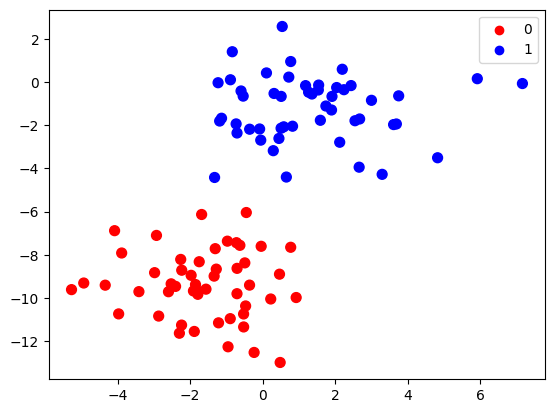

In [ ]:

plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50) # s: marker_size
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=label) ## muc dich generate legend

plt.legend()

In [20]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB 
# MultinomialNB: multiple features Naive Bayes
# Gaussian Naive Bayes

In [22]:
model = GaussianNB() # mô hình được sử dụng trong loại dữ liệu mà các thành phần là các biến liên tục
model.fit(X, y)

,priors,None
,var_smoothing,1e-09


In [ ]:
print("Means:", model.theta_) #means #tham số của mô hình
print("Variances:", model.var_)

Means: [[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]
Variances: [[2.06097005 2.47716872]
 [3.33164807 2.22401384]]


In [ ]:
def plot_ellipse():
    pass